#### Imports

In [33]:
import pandas as pd
import numpy as np
from pandas.api.types import is_numeric_dtype
from catboost import CatBoostClassifier, Pool 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix


#### Read in Dataset

In [3]:
dogs = pd.read_csv('../data/dogs.csv')

#### Feature Selection

In [4]:
dogs = dogs.dropna(subset=['outcome_type', 'intake_sex'])

In [5]:
features = [
    'intake_type',
    'intake_condition',
    'intake_sex',
    'intake_spay_neuter',
    'intake_age_in_years',
    'breed',
    'color',
    'found_city',
]

target = ['outcome_type']

In [13]:
dogs = dogs[
            (dogs['outcome_type'].isin(['Adoption', 'Return to Owner', 'Transfer', 'Euthanasia'])) &
            (dogs['intake_condition'] == 'Normal')
            ]

In [14]:
X = dogs[features]
y = dogs[target]

In [15]:
y['outcome_type'].value_counts()

Adoption           31392
Return to Owner    18277
Transfer           13037
Euthanasia          1028
Name: outcome_type, dtype: int64

In [21]:
#Combining Adoption since Transfers are initiated to increase liklihood of adoption

y = y['outcome_type'].str.replace('Transfer', 'Adoption')

In [23]:
y.value_counts()

Adoption           44429
Return to Owner    18277
Euthanasia          1028
Name: outcome_type, dtype: int64

In [24]:
#CatBoost requires the specification of categorical columns. This function gets the list of categorical indicies

def get_categorical_indicies(X):
    cats = []
    for col in X.columns:
        if is_numeric_dtype(X[col]):
            pass
        else:
            cats.append(col)
    cat_indicies = []
    for col in cats:
        cat_indicies.append(X.columns.get_loc(col))
    return cat_indicies

categorical_indicies = get_categorical_indicies(X)

In [25]:
categorical_indicies

[0, 1, 2, 3, 5, 6, 7]

In [26]:
#CatBoost needs the categorical columns to be converted to the categorical datatype

def convert_cats(X):
    cats = []
    for col in X.columns:
        if is_numeric_dtype(X[col]):
            pass
        else:
            cats.append(col)
    cat_indicies = []
    for col in cats:
        X[col] = X[col].astype('category')

convert_cats(X)

<ipython-input-26-6025a30c5164>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype('category')


#### Train, Test, Split and Pooling

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=63)

In [28]:
train_dataset = Pool(X_train, 
                     y_train,
                     cat_features=categorical_indicies
                    )
test_dataset = Pool(X_test, 
                    y_test,
                    cat_features=categorical_indicies
                   )

#### Model Training and Prediction

In [29]:
clf = CatBoostClassifier()

clf.fit(train_dataset)

preds = clf.predict(test_dataset)

print(preds)

Learning rate set to 0.096377
0:	learn: 1.0012709	total: 118ms	remaining: 1m 57s
1:	learn: 0.9259866	total: 154ms	remaining: 1m 16s
2:	learn: 0.8646790	total: 199ms	remaining: 1m 6s
3:	learn: 0.8159303	total: 234ms	remaining: 58.2s
4:	learn: 0.7742638	total: 273ms	remaining: 54.4s
5:	learn: 0.7402857	total: 303ms	remaining: 50.1s
6:	learn: 0.7103181	total: 345ms	remaining: 49s
7:	learn: 0.6849186	total: 382ms	remaining: 47.3s
8:	learn: 0.6636722	total: 423ms	remaining: 46.5s
9:	learn: 0.6445137	total: 460ms	remaining: 45.5s
10:	learn: 0.6276128	total: 512ms	remaining: 46s
11:	learn: 0.6130062	total: 570ms	remaining: 46.9s
12:	learn: 0.6007541	total: 624ms	remaining: 47.4s
13:	learn: 0.5893891	total: 691ms	remaining: 48.7s
14:	learn: 0.5791173	total: 753ms	remaining: 49.5s
15:	learn: 0.5705614	total: 805ms	remaining: 49.5s
16:	learn: 0.5627192	total: 867ms	remaining: 50.1s
17:	learn: 0.5557154	total: 921ms	remaining: 50.2s
18:	learn: 0.5495833	total: 983ms	remaining: 50.8s
19:	learn: 0.

163:	learn: 0.4823703	total: 8.02s	remaining: 40.9s
164:	learn: 0.4822606	total: 8.09s	remaining: 40.9s
165:	learn: 0.4821120	total: 8.13s	remaining: 40.9s
166:	learn: 0.4819751	total: 8.18s	remaining: 40.8s
167:	learn: 0.4818841	total: 8.22s	remaining: 40.7s
168:	learn: 0.4817677	total: 8.27s	remaining: 40.6s
169:	learn: 0.4817305	total: 8.31s	remaining: 40.6s
170:	learn: 0.4816876	total: 8.37s	remaining: 40.6s
171:	learn: 0.4815722	total: 8.42s	remaining: 40.5s
172:	learn: 0.4815434	total: 8.47s	remaining: 40.5s
173:	learn: 0.4815194	total: 8.54s	remaining: 40.5s
174:	learn: 0.4814924	total: 8.6s	remaining: 40.6s
175:	learn: 0.4814636	total: 8.67s	remaining: 40.6s
176:	learn: 0.4814494	total: 8.72s	remaining: 40.6s
177:	learn: 0.4813936	total: 8.77s	remaining: 40.5s
178:	learn: 0.4813036	total: 8.82s	remaining: 40.5s
179:	learn: 0.4812844	total: 8.87s	remaining: 40.4s
180:	learn: 0.4812064	total: 8.91s	remaining: 40.3s
181:	learn: 0.4811105	total: 8.95s	remaining: 40.2s
182:	learn: 0

326:	learn: 0.4725687	total: 15.4s	remaining: 31.6s
327:	learn: 0.4724966	total: 15.4s	remaining: 31.5s
328:	learn: 0.4724370	total: 15.4s	remaining: 31.5s
329:	learn: 0.4723960	total: 15.5s	remaining: 31.4s
330:	learn: 0.4723612	total: 15.5s	remaining: 31.4s
331:	learn: 0.4723312	total: 15.5s	remaining: 31.3s
332:	learn: 0.4722738	total: 15.6s	remaining: 31.2s
333:	learn: 0.4722576	total: 15.6s	remaining: 31.1s
334:	learn: 0.4722425	total: 15.7s	remaining: 31.1s
335:	learn: 0.4722209	total: 15.7s	remaining: 31s
336:	learn: 0.4721822	total: 15.7s	remaining: 30.9s
337:	learn: 0.4721316	total: 15.8s	remaining: 30.9s
338:	learn: 0.4720963	total: 15.8s	remaining: 30.9s
339:	learn: 0.4720256	total: 15.9s	remaining: 30.8s
340:	learn: 0.4719626	total: 15.9s	remaining: 30.8s
341:	learn: 0.4719085	total: 16s	remaining: 30.7s
342:	learn: 0.4718686	total: 16s	remaining: 30.7s
343:	learn: 0.4717972	total: 16.1s	remaining: 30.6s
344:	learn: 0.4716154	total: 16.1s	remaining: 30.6s
345:	learn: 0.4715

487:	learn: 0.4634266	total: 22.6s	remaining: 23.7s
488:	learn: 0.4633717	total: 22.6s	remaining: 23.7s
489:	learn: 0.4633332	total: 22.7s	remaining: 23.6s
490:	learn: 0.4632872	total: 22.7s	remaining: 23.6s
491:	learn: 0.4632348	total: 22.8s	remaining: 23.5s
492:	learn: 0.4631778	total: 22.8s	remaining: 23.5s
493:	learn: 0.4631250	total: 22.9s	remaining: 23.4s
494:	learn: 0.4631112	total: 22.9s	remaining: 23.4s
495:	learn: 0.4630985	total: 22.9s	remaining: 23.3s
496:	learn: 0.4630554	total: 23s	remaining: 23.3s
497:	learn: 0.4630108	total: 23s	remaining: 23.2s
498:	learn: 0.4629672	total: 23.1s	remaining: 23.2s
499:	learn: 0.4628903	total: 23.1s	remaining: 23.1s
500:	learn: 0.4627961	total: 23.1s	remaining: 23.1s
501:	learn: 0.4627450	total: 23.2s	remaining: 23s
502:	learn: 0.4626740	total: 23.2s	remaining: 22.9s
503:	learn: 0.4626212	total: 23.3s	remaining: 22.9s
504:	learn: 0.4625470	total: 23.3s	remaining: 22.9s
505:	learn: 0.4624133	total: 23.4s	remaining: 22.8s
506:	learn: 0.4623

648:	learn: 0.4550519	total: 30.3s	remaining: 16.4s
649:	learn: 0.4550012	total: 30.3s	remaining: 16.3s
650:	learn: 0.4549438	total: 30.4s	remaining: 16.3s
651:	learn: 0.4549209	total: 30.4s	remaining: 16.2s
652:	learn: 0.4548919	total: 30.5s	remaining: 16.2s
653:	learn: 0.4548292	total: 30.5s	remaining: 16.2s
654:	learn: 0.4547839	total: 30.6s	remaining: 16.1s
655:	learn: 0.4547148	total: 30.6s	remaining: 16.1s
656:	learn: 0.4546786	total: 30.7s	remaining: 16s
657:	learn: 0.4546017	total: 30.7s	remaining: 16s
658:	learn: 0.4545480	total: 30.8s	remaining: 15.9s
659:	learn: 0.4545002	total: 30.8s	remaining: 15.9s
660:	learn: 0.4544612	total: 30.9s	remaining: 15.8s
661:	learn: 0.4543608	total: 30.9s	remaining: 15.8s
662:	learn: 0.4543492	total: 31s	remaining: 15.7s
663:	learn: 0.4542715	total: 31s	remaining: 15.7s
664:	learn: 0.4542402	total: 31s	remaining: 15.6s
665:	learn: 0.4541881	total: 31.1s	remaining: 15.6s
666:	learn: 0.4541499	total: 31.1s	remaining: 15.5s
667:	learn: 0.4540578	

810:	learn: 0.4471025	total: 37.8s	remaining: 8.8s
811:	learn: 0.4470543	total: 37.8s	remaining: 8.76s
812:	learn: 0.4470257	total: 37.9s	remaining: 8.71s
813:	learn: 0.4469543	total: 37.9s	remaining: 8.66s
814:	learn: 0.4469365	total: 38s	remaining: 8.61s
815:	learn: 0.4468471	total: 38s	remaining: 8.57s
816:	learn: 0.4467995	total: 38s	remaining: 8.52s
817:	learn: 0.4467816	total: 38.1s	remaining: 8.47s
818:	learn: 0.4467183	total: 38.1s	remaining: 8.43s
819:	learn: 0.4467060	total: 38.2s	remaining: 8.38s
820:	learn: 0.4466768	total: 38.2s	remaining: 8.33s
821:	learn: 0.4466182	total: 38.3s	remaining: 8.29s
822:	learn: 0.4465891	total: 38.3s	remaining: 8.24s
823:	learn: 0.4465345	total: 38.4s	remaining: 8.19s
824:	learn: 0.4465009	total: 38.4s	remaining: 8.14s
825:	learn: 0.4464564	total: 38.4s	remaining: 8.1s
826:	learn: 0.4464048	total: 38.5s	remaining: 8.05s
827:	learn: 0.4463824	total: 38.5s	remaining: 8s
828:	learn: 0.4463330	total: 38.6s	remaining: 7.96s
829:	learn: 0.4462944	t

970:	learn: 0.4397667	total: 45.5s	remaining: 1.36s
971:	learn: 0.4397343	total: 45.6s	remaining: 1.31s
972:	learn: 0.4396898	total: 45.6s	remaining: 1.27s
973:	learn: 0.4396700	total: 45.7s	remaining: 1.22s
974:	learn: 0.4396419	total: 45.7s	remaining: 1.17s
975:	learn: 0.4396116	total: 45.8s	remaining: 1.13s
976:	learn: 0.4395729	total: 45.8s	remaining: 1.08s
977:	learn: 0.4395598	total: 45.9s	remaining: 1.03s
978:	learn: 0.4395253	total: 45.9s	remaining: 985ms
979:	learn: 0.4395128	total: 46s	remaining: 939ms
980:	learn: 0.4395003	total: 46s	remaining: 892ms
981:	learn: 0.4394538	total: 46.1s	remaining: 845ms
982:	learn: 0.4393914	total: 46.1s	remaining: 798ms
983:	learn: 0.4392445	total: 46.2s	remaining: 751ms
984:	learn: 0.4392251	total: 46.2s	remaining: 704ms
985:	learn: 0.4391825	total: 46.3s	remaining: 657ms
986:	learn: 0.4391554	total: 46.3s	remaining: 610ms
987:	learn: 0.4391277	total: 46.4s	remaining: 563ms
988:	learn: 0.4391031	total: 46.4s	remaining: 516ms
989:	learn: 0.43

#### Model Performance

In [30]:
print(classification_report(y_test, preds))

                 precision    recall  f1-score   support

       Adoption       0.83      0.89      0.86     11047
     Euthanasia       0.88      0.05      0.10       270
Return to Owner       0.68      0.60      0.64      4617

       accuracy                           0.79     15934
      macro avg       0.79      0.51      0.53     15934
   weighted avg       0.78      0.79      0.78     15934



In [32]:
print(confusion_matrix(y_test, preds))

[[9784    2 1261]
 [ 188   14   68]
 [1849    0 2768]]


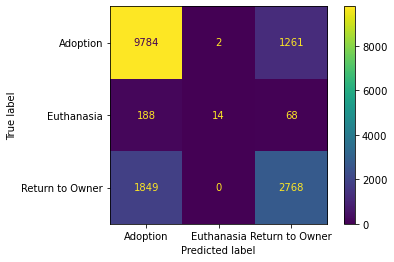

In [38]:
plot_confusion_matrix(clf, X_test, y_test);

In [39]:
clf.get_feature_importance(prettified=True)

,Feature Id,Importances
0,breed,27.046959
1,color,18.489541
2,intake_age_in_years,16.372071
3,intake_type,13.317430
4,intake_spay_neuter,9.660950
5,intake_sex,7.738394
6,found_city,7.374655
7,intake_condition,0.000000
